In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GET the webpage
and check the status code to know it was successful

In [2]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

# EXTRACT data from html 

In [3]:
music = BeautifulSoup(response.content, 'lxml')
print(music.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


# Place the data 
separate objects unless put into a list

In [4]:
names = music.find_all('div', attrs = {'class': 'vertical-card_content--title'})
names

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

# Loop to clean data

In [5]:
artists = []
for i in range(len(names)):
    name = names[i].get_text().replace("\n", "")
    artists.append(name)
print(artists)
type(names)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


bs4.element.ResultSet

# Again for the years

year = []
for element in x:
    year.append(element.strip())

print(year)



.get_text()

In [6]:
years = music.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
type(years)

bs4.element.ResultSet

In [7]:
inducted = []
for i in range(len(years)):
    yr = years[i].get_text().replace("\n", "").replace("Inducted ", "").strip()
    inducted.append(yr)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


# Make names and years into a df

In [8]:
combo =pd.DataFrame(list(zip(artists,inducted)),columns=['Name','Inducted'])
combo

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


# Combine and GET all URLs

In [9]:
home_url = str('https://countrymusichalloffame.org/hall-of-fame/members')
home_url

'https://countrymusichalloffame.org/hall-of-fame/members'

In [10]:
pages = [home_url]
page = 2
for n in range(15):
    address = home_url+'/page/'+str(page)
    pages.append(address)
    page +=1
for i in pages:
    get_pages = requests.get(i)
    page_soup = BeautifulSoup(get_pages.content, 'lxml')
pages

['https://countrymusichalloffame.org/hall-of-fame/members',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/2',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/3',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/4',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/5',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/6',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/7',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/8',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/9',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/10',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/11',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/12',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/13',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/14',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/1

In [11]:
artists_all = []
years_all = []
for i in pages:
    get_pages = requests.get(i)
    page_soup = BeautifulSoup(get_pages.content, 'lxml')
    find_name = page_soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
    find_year = page_soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    rangen = len(find_name)
    rangey = len(find_year)
    for i in range(rangen):
        name = find_name[i].text.replace("\n", "").strip()
        artists_all.append(name) 
    for i in range(rangey):
        years = find_year[i].text.replace("\n", "").replace("Inducted", "").strip()
        years_all.append(years)
artists_all , years_all


(['Roy Acuff',
  'Alabama',
  'Bill Anderson',
  'Eddy Arnold',
  'Chet Atkins',
  'Gene Autry',
  'DeFord Bailey',
  'Bobby Bare',
  'Johnny Bond',
  'Bobby Braddock',
  'Harold Bradley',
  'Jerry Bradley',
  'Owen Bradley',
  'Rod Brasfield',
  'Garth Brooks',
  'Brooks & Dunn',
  'Jim Ed Brown',
  'Jim Ed Brown and the Browns',
  'Boudleaux and Felice Bryant',
  'Glen Campbell',
  'Bill Carlisle',
  'Carter Family',
  'Johnny Cash',
  'Roy Clark',
  'Cowboy Jack Clement',
  'Patsy Cline',
  'Hank Cochran',
  'Paul Cohen',
  'Floyd Cramer',
  'Vernon Dalhart',
  'Charlie Daniels',
  'Jimmie Davis',
  'Jimmy Dean',
  'Delmore Brothers',
  'Jim Denny',
  'Little Jimmy Dickens',
  'Ralph Emery',
  'The Everly Brothers',
  'Flatt And Scruggs',
  'Jim Foglesong',
  'Red Foley',
  'Tennessee Ernie Ford',
  'Fred Foster',
  'Joseph Frank',
  'Lefty Frizzell',
  'Connie B. Gay',
  'Don Gibson',
  'Vince Gill',
  'Johnny Gimble',
  'Merle Haggard',
  'Tom T. Hall',
  'Emmylou Harris',
  'Geor

In [12]:
hof_df =pd.DataFrame(list(zip(artists_all,years_all)),columns=['Name','Inducted'])
hof_df['Inducted'] = pd.to_datetime(hof_df['Inducted']).dt.year
hof_df

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


NameError: name 'F0B23A' is not defined

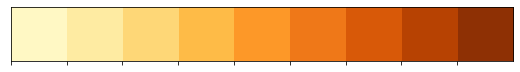

In [13]:
custom_palette = sns.color_palette("YlOrBr", 9)
sns.palplot(custom_palette)

pal_hls = F0B23A.as_hex()
print(pal_hls); 

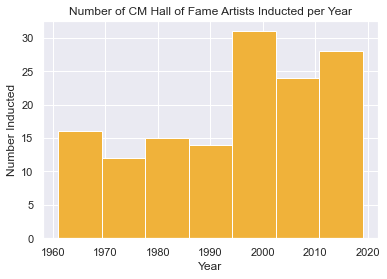

In [19]:
hof_df_sorted = hof_df.sort_values('Inducted')
plt.hist(hof_df_sorted['Inducted'],bins=7, color = '#F0B23A')
plt.xlabel('Year')
plt.ylabel('Number Inducted')
plt.title('Number of CM Hall of Fame Artists Inducted per Year')
plt.grid(True)

plt.savefig('../imgs/Count_orange1.png', transparent = True)
plt.show()

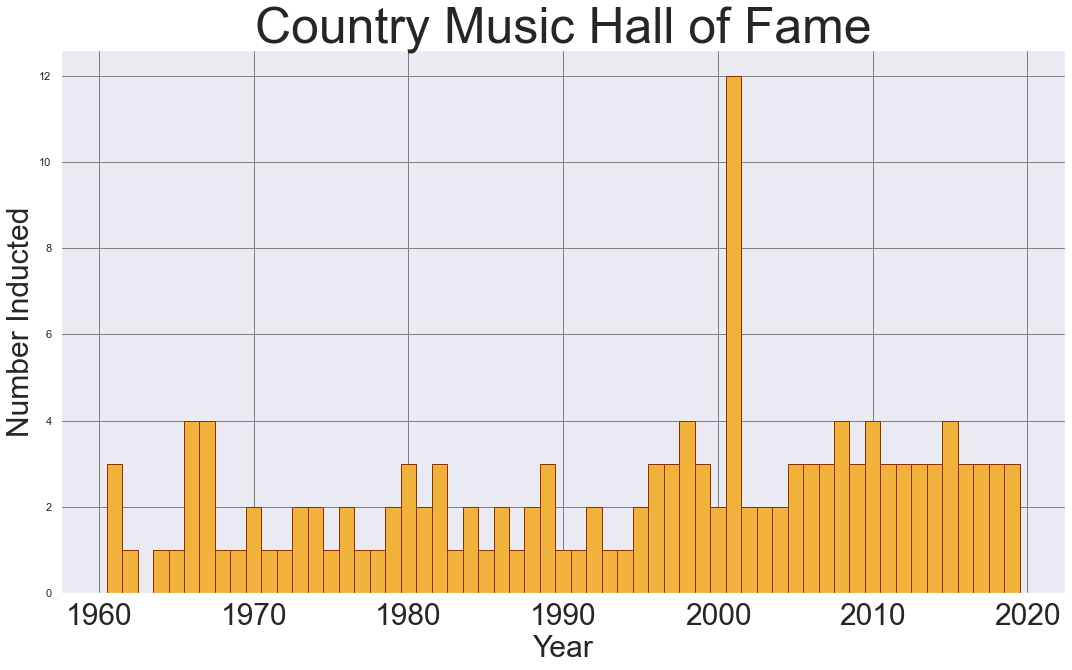

In [18]:
group = hof_df_sorted.groupby('Inducted').count().reset_index()
group = group.rename({'Name': 'Count'}, axis=1)

hof_df_sorted = hof_df.sort_values('Inducted')
plt.figure(figsize=(18,10))
plt.bar(group['Inducted'],height = group['Count'],  color = '#F0B23A', edgecolor = custom_palette[8], width = 1)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Number Inducted',fontsize=30)
plt.title('Country Music Hall of Fame',fontsize=50)
plt.grid(True, color = 'grey')
plt.xticks(fontsize=30)

plt.savefig('../imgs/Count_orange2.png', transparent = True)
plt.show()